In [1]:
# Import stuff: 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

from sympy import Symbol
from sympy.solvers import solve

# This is for reasonable fontsize universally defined:
fs_label = 16
parameters = {                
                'figure.titlesize': fs_label+6,
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.linewidth': 6
             }
plt.rcParams.update(parameters)

# We could also try with the colours:
#plt.rcParams['lines.color'] = 'r' # maybe here with more colours if needed?

In [2]:
# Not yet done, but please dont erase; im working on it! 

# C = lambda b, R: sum(b[i]*R[i] for i in range(len(Rs))

# def deriv(state, t, *params):
#     eps, bs, ds, rs, Ks nR = params
#     Rs, Ns = state[:nR], state[nR:]
#     C = lambda : sum(R[i]*bs[i,j] for i in range(len(Rs))
#     dR_dt = np.zeros(nR)
#     dN_dt = np.zeros(len(state) - nR)
#     for iR, R in enumerate(Rs):
#         dR_dt[iR] = rs[iR]*(K[iR] - R) - sum(C(b[j]*R[j]))
#     
#     dN_dt = r*N - b*N*P
#     return np.array([dP_dt, dN_dt])

In [3]:
# Solve for the equilibrium abundances of prey and predator
#N = Symbol('N')
#P = Symbol('P')
#solve([eps*b*N*P - d*P, r*N - b*N*P])

In [4]:
def deriv(state, t, *params):
    eps, bs, ds, c_max, r, K, nR = params
    Rs, Ns = state[:nR], state[nR:]
    R = Rs[0]
    C = lambda i: R*bs[i]*c_max[i]/(R*bs[i] + c_max[i])
    dR_dt = r*K - r*R - sum(C(i)*Ns[i] for i in range(len(Ns)))
    dN_dt = np.zeros(len(Ns))
    for iN, N in enumerate(Ns):
        dN_dt[iN] = eps[iN]*C(iN)*N - ds[iN]*N
    return np.array([dR_dt, *dN_dt])

In [7]:
# parameter considerations:

yr = 365 # day/yr
feed_freq = 1 # 1/day (eats every day)
feed_quant = 0.01 # g (single meal quant)
feed_yr = feed_quant*feed_freq*yr # g/yr

offspring = 2 # offspr/(beetle*yr) 
eps = [offspring/feed_yr]*2 # 1/g  # Unit: [#N/g]
print(eps)
eps = [0.5, 0.5]
print(eps)

bs = [0.12, 0.12] # sqm /(day*beetle) 
bs = [yr*i for i in bs] # sqm /(yr*beetle) # Unit: [sqm/(year*#N)]
print(bs)


ds = [1.]*2 #  (lifespan 1 yr) # Unit: [1/yr]

c_maxs = [0.006, 0.0059] # g/(beetle*day)
c_maxs = [yr*i for i in c_maxs] # g/(beetle*yr) # Unit: [g/(year*#N)]
print(c_maxs)

# r1 = 365 # Unit: [1/yr]
# r2 = 0.5
r = 10
K = 10000 # Unit: [g/sqm]
nR = 1 # number of distinct resources
V = 20 # Unit: [sqm]


# All units: 
    # N1: [#N1/sqm], N2: [#N2/sqm], R: [g/sqm]
    # r: [1/yr], b: [sqm/(year*#N)], cmax: [g/(year*#N)], d: [1/yr], eps: [#N/g]

[0.547945205479452, 0.547945205479452]
[0.5, 0.5]
[43.8, 43.8]
[2.19, 2.1534999999999997]


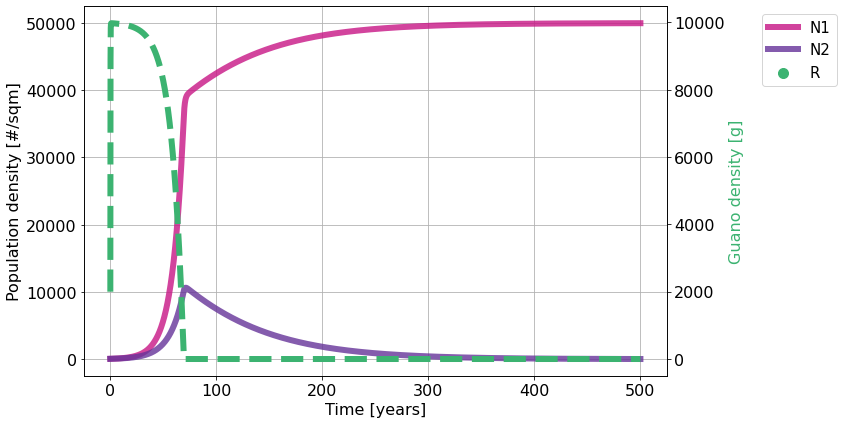

In [8]:
init_state = [2000, 50, 50]
t = np.linspace(0, 500, 10000)
params = (eps, bs, ds, c_maxs, r, K, nR )

# deriv(init_state, t, *params)

sol = odeint(deriv, init_state, t, params).T
R, N1, N2 = sol



fig, ax1 = plt.subplots(1,1, figsize=(12, 6), tight_layout=True)
ax2 = ax1.twinx()
#ax1.set_ylim(0, 5000)
ax1.grid()

ax2.plot(t, R, label="R", color = 'mediumseagreen', linestyle="--")
ax1.plot(t, N1, label="N1", color = 'mediumvioletred', alpha=0.8)
ax1.plot(t, N2, label="N2", color = 'rebeccapurple', alpha=0.8)
ax1.scatter([], [], s=100, label="R", color = 'mediumseagreen')

ax1.set_ylabel('Population density [#/sqm]')
ax2.set_ylabel('Guano density [g]', color = 'mediumseagreen') 
ax1.set_xlabel('Time [years]') 

ax1.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.5, fontsize=15) 

In [ ]:
print(sol[0].tolist())

In [ ]:
print(sol[2].tolist())

In [ ]:
def deriv(state, t, *params):
    eps, bs, ds, c_max, r, K, nR = params
    Rs, Ns = state[:nR], state[nR:]
    
    R_char = lambda j: np.sum([bs[j][i]*Rs[i] for i in range(len(Rs))])
    C = lambda j: R_char(j)*c_max[j]/(R_char(j) + c_max[j])
    
    dR_dt = np.zeros(len(Rs))
    for iR, R in enumerate(Rs):
        dR_dt[iR] = r*(K - R) - sum(C(j)*Ns[j] for j in range(len(Ns)))
    
    dN_dt = np.zeros(len(Ns))
    for iN, N in enumerate(Ns):
        dN_dt[iN] = (eps[iN]*C(iN) - ds[iN])*N
    
    return np.array([*dR_dt, *dN_dt])

In [ ]:
bs = np.array([[0.1, 0.12],[0.15, 0.1]]) # sqm /(day*beetle)
bs = np.multiply(bs, yr) # sqm /(yr*beetle)

c_maxs = [0.1, 0.5] # g/(beetle*day)
c_maxs = [yr*i for i in c_maxs] # g/(beetle*yr)

init_state = [100, 100, 50, 50]
nR = 2

params = (eps, bs, ds, c_maxs, r, K, nR )
sol = odeint(deriv, init_state, t, params).T
R1, R2, N1, N2 = sol

# print(R1)

fig, ax1 = plt.subplots(1,1, figsize=(12, 6), tight_layout=True)
ax2.plot(t, R1*V)# , label="R", color = 'mediumseagreen', linestyle="--")
ax2.plot(t, R2*V)# , label="R", color = 'mediumseagreen', linestyle="--")
ax2.plot(t, N1*V)# , label="R", color = 'mediumseagreen', linestyle="--")
ax2.plot(t, N2*V)# , label="R", color = 'mediumseagreen', linestyle="--")


In [ ]:
# I turned r and d into units [1/day]
# I also reduced B A LOT LOT LOT
# now it works!

# parameter considerations:

yr = 365 # day/yr
feed_freq = 1 # 1/day (eats every day)
feed_quant = 0.01 # g (single meal quant)
feed_yr = feed_quant*feed_freq*yr # g/yr

offspring = 4 # offspr/(beetle*yr) 
eps = [offspring/feed_yr]*2 # 1/g  # Unit: [#N/g]
print(eps)
#eps = [0.5, 0.5]
#print(eps)

bs = [0.0000012, 0.0000012] # sqm /(day*beetle) 
#bs = [yr*i for i in bs] # sqm /(yr*beetle) # Unit: [sqm/(year*#N)]
print(bs)


#ds = [1.]*2 #  (lifespan 1 yr) # Unit: [1/yr]
ds = [1/yr, 1/yr]  # Unit: [1/day]
print(ds)

c_maxs = [0.1, 0.12] # g/(beetle*day)
#c_maxs = [yr*i for i in c_maxs] # g/(beetle*yr) # Unit: [g/(year*#N)]
print(c_maxs)

# r1 = 365 # Unit: [1/yr]
# r2 = 0.5

#r = 10 # Unit: [1/yr]
r = 10/yr  # Unit: [1/day]
K = 10000 # Unit: [g/sqm]


nR = 1 # number of distinct resources
V = 20 # Unit: [sqm]


# All units: 
    # N1: [#N1/sqm], N2: [#N2/sqm], R: [g/sqm]
    # r: [1/yr], b: [sqm/(year*#N)], cmax: [g/(year*#N)], d: [1/yr], eps: [#N/g]
    
    
init_state = [0, 50, 50]
t = np.linspace(0, 5000, 100000)
params = (eps, bs, ds, c_maxs, r, K, nR )

# deriv(init_state, t, *params)

sol = odeint(deriv, init_state, t, params).T
R, N1, N2 = sol



fig, ax1 = plt.subplots(1,1, figsize=(12, 6), tight_layout=True)
ax2 = ax1.twinx()
#ax1.set_ylim(0, 5000)
ax1.grid()

ax2.plot(t, R, label="R", color = 'mediumseagreen', linestyle="--")
ax1.plot(t, N1, label="N1", color = 'mediumvioletred', alpha=0.8)
ax1.plot(t, N2, label="N2", color = 'rebeccapurple', alpha=0.8)
ax1.scatter([], [], s=100, label="R", color = 'mediumseagreen')

ax1.set_ylabel('Population density [#/sqm]')
ax2.set_ylabel('Guano density [g]', color = 'mediumseagreen') 
ax1.set_xlabel('Time [days]') 

ax1.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.5, fontsize=15) 

In [ ]:
# I turned r and d into units [1/yr]
# I also reduced B A LOT LOT LOT
# now it works!

# parameter considerations:

yr = 365 # day/yr
feed_freq = 1 # 1/day (eats every day)
feed_quant = 0.01 # g (single meal quant)
feed_yr = feed_quant*feed_freq*yr # g/yr

offspring = 4 # offspr/(beetle*yr) 
eps = [offspring/feed_yr]*2 # 1/g  # Unit: [#N/g]
print(f'eps is:{eps}')
#eps = [0.5, 0.5]
#print(eps)

bs = [0.0000012, 0.0000012] # sqm /(day*beetle) 
bs = [yr*i for i in bs] # sqm /(yr*beetle) # Unit: [sqm/(year*#N)]
print(f'b is:{bs}')


ds = [1.]*2 #  (lifespan 1 yr) # Unit: [1/yr]
#ds = [1/yr, 1/yr]  # Unit: [1/day]
print(f'd is:{ds}')

c_maxs = [0.1, 0.12] # g/(beetle*day)
c_maxs = [yr*i for i in c_maxs] # g/(beetle*yr) # Unit: [g/(year*#N)]
print(c_maxs)

# r1 = 365 # Unit: [1/yr]
# r2 = 0.5

r = 10 # Unit: [1/yr]
#r = 10/yr  # Unit: [1/day]
K = 10000 # Unit: [g/sqm]


nR = 1 # number of distinct resources
V = 20 # Unit: [sqm]


# All units: 
    # N1: [#N1/sqm], N2: [#N2/sqm], R: [g/sqm]
    # r: [1/yr], b: [sqm/(year*#N)], cmax: [g/(year*#N)], d: [1/yr], eps: [#N/g]
    
    
init_state = [0, 50, 50]
t = np.linspace(0, 5000, 100000)
params = (eps, bs, ds, c_maxs, r, K, nR )

# deriv(init_state, t, *params)

sol = odeint(deriv, init_state, t, params).T
R, N1, N2 = sol



fig, ax1 = plt.subplots(1,1, figsize=(12, 6), tight_layout=True)
ax2 = ax1.twinx()
#ax1.set_ylim(0, 5000)
ax1.grid()

ax2.plot(t, R, label="R", color = 'mediumseagreen', linestyle="--")
ax1.plot(t, N1, label="N1", color = 'mediumvioletred', alpha=0.8)
ax1.plot(t, N2, label="N2", color = 'rebeccapurple', alpha=0.8)
ax1.scatter([], [], s=100, label="R", color = 'mediumseagreen')

ax1.set_ylabel('Population density [#/sqm]')
ax2.set_ylabel('Guano density [g]', color = 'mediumseagreen') 
ax1.set_xlabel('Time [days]') 

ax1.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.5, fontsize=15) 